In [127]:
%pip install -e /Users/jlanders/PycharmProjects/textalloc

Obtaining file:///Users/jlanders/PycharmProjects/textalloc
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for textalloc (pyproject.toml) ... done
  Created wheel for textalloc: filename=textalloc-0.0.6-0.editable-py3-none-any.whl size=4536 sha256=ba1e6f9767054ed359e5513130555103751049b1261f3afdeb082a1e35e496f8
  Stored in directory: /private/var/folders/9h/cx1bp4z95ldcks7z_7lm3h280000gn/T/pip-ephem-wheel-cache-1mymri_m/wheels/97/db/82/7c061a00764f37b103407eac53634e26385d60637fdaa81b19
Successfully built textalloc
  Attempting uninstall: textalloc
    Found existing installation: textalloc 0.0.7
    Uninstalling textalloc-0.0.7:
      Successfully uninstalled textalloc-0.0.7
Note: you may need to restart the kernel to use updated packages.


In [1]:

%load_ext autoreload
%autoreload 2
    
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import textalloc as ta


# Beta

In [3]:
def anotate_locations(ax, x_locs, labels, loc='above', ax_name='annotation_intervals' ,
                      fontsize=11, levels=None, scaler=-.2, min_offset=1.2):

    ylims = ax[ax_name].get_ylim()#[-1,0]
    if loc=='above':
        y_locs = [ylims[1] for x_loc in x_locs]
        dir_sign = -1
    else:
        y_locs = [ylims[0] for x_loc in x_locs]
        dir_sign=1


    if levels is None:
        levels = np.array([.2, .55])
    tracks = [0]*len(levels)

    levels = levels*5
    slot = levels[0]
    arrowprops = dict(
    arrowstyle="-",
    # connectionstyle="angle,angleA=0,angleB=90,rad=10"
)
    for ik, loc in enumerate(x_locs):
        s = labels[ik]#str(int(loc))
        ann = ax[ax_name].text(loc, scaler*slot, s, size=fontsize)
        box = ax[ax_name].transData.inverted().transform(
                ann.get_tightbbox(fig.canvas.get_renderer())
            )
        w, h = box[1][0] - box[0][0], box[1][1] - box[0][1]
        
        if tracks[0]+.5*w > loc:
            # print(x1, loc, x2)
            slot=levels[ik%len(levels)]
            tracks[ik%len(levels)]=loc+w
            # print(x1, loc, x2)
        else:
            slot = levels[0]
            tracks[0]=loc+w
            # print(x1, loc, x2, w)
        if np.abs(-h*slot)> np.abs(min_offset*h):
            ax[ax_name].annotate(
            s,(loc, y_locs[ik]),
            (loc, dir_sign*h*slot),
            va='top', ha='center',
            # xytext=(-2*offset, offset), textcoords='offset points',
            # bbox=bbox, 
            arrowprops=arrowprops, 
            **{'size':fontsize}
        )
        else:
            ax[ax_name].text(loc, dir_sign*h*slot, s, size=fontsize, va='top', ha='center')
        ann.remove()

/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(
/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


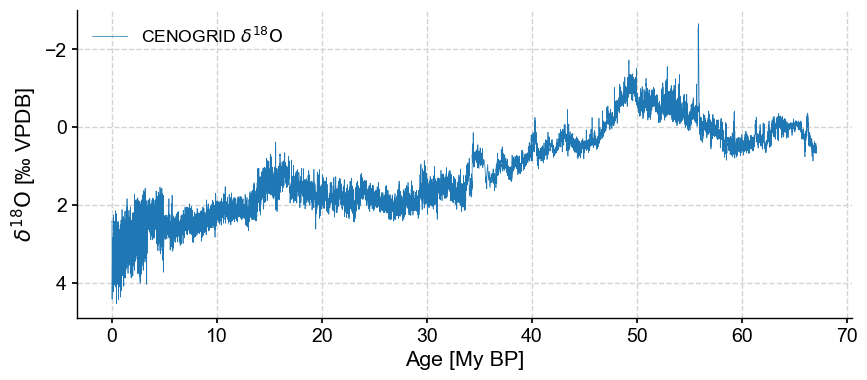

In [3]:
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
fig, ax = ts_18.plot(invert_yaxis=True,linewidth=0.5)

ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')
# note: should there be "invert_yaxis" behavior?

dict

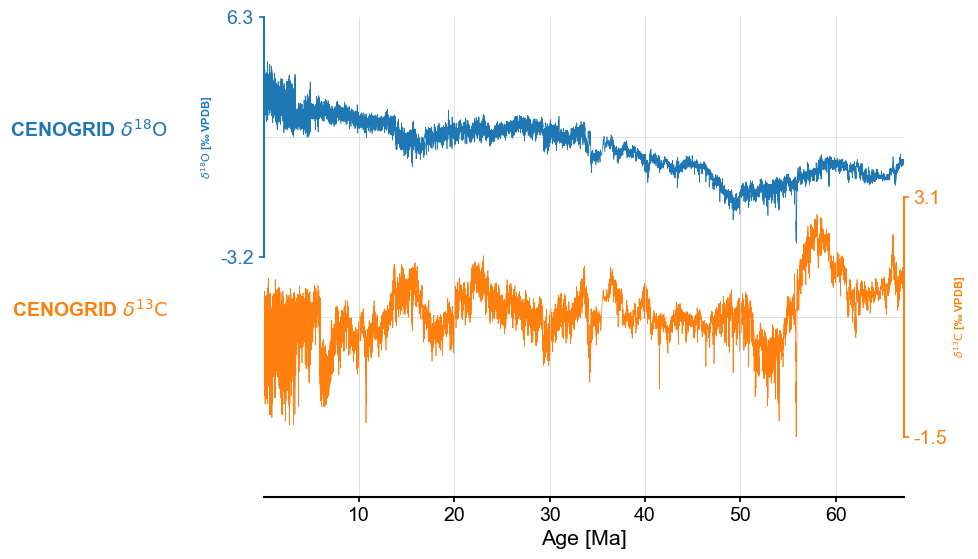

In [4]:
fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)
type(ax)

/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(
/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


<Axes: >

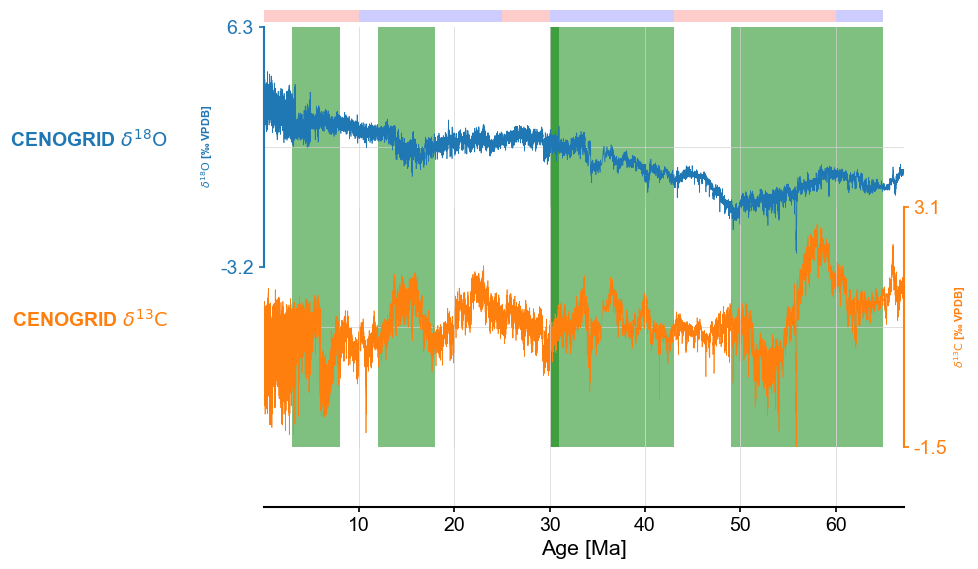

In [113]:
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

def make_annotation_ax(fig, ax, loc='overlay', 
                       ax_name = 'highlighted_intervals', 
                       height=.025, v_offset=0,
                       width = None, h_offset=0,
                       zorder=-1):
    if type(ax) !=dict:
        ax= {0:ax}
        
    ll = []
    ur = []
    keys_list = [key for key in ax.keys() if type(key)==int]
    keys_list.sort()
    
    for ax_key in keys_list:
        bbox_coords =ax[ax_key].get_position()  
        ll.append(bbox_coords._points[0].tolist())
        ur.append(bbox_coords._points[1].tolist())
    
    b = min([_ll[1] for _ll in ll])
    l = min([_ll[0] for _ll in ll])
    u = max([_ur[1] for _ur in ur])
    r = max([_ur[0] for _ur in ur]) 

    if width is None:
        width = r-l
    if loc == 'overlay':
        height = u-b
        b = b+v_offset
        l = l+h_offset
    if loc == 'above':
        b = u+v_offset
        l = l+h_offset
    if loc == 'below':
        b = l-height-v_offset
        l = l+h_offset

    ax[ax_name] = fig.add_axes([l, b, width, height],
                                                 **{'zorder':zorder})
    ax[ax_name].set_xlim(ax[ax_key].get_xlim())
    ax[ax_name] =make_phantom_ax(ax[ax_name])
    return ax

def hightlight_intervals(ax, intervals, color='g', alpha=.3):

    if isinstance(intervals[0], list) is False:
    # if type(intervals[0]) != list:
        intervals = [intervals]
    for ik, _ts in enumerate(intervals):
        if isinstance(color, list) is True:
            c = color[ik]
        else:
            c = color
        if isinstance(alpha, list) is True:
            a = alpha[ik]
        else:
            a = alpha

        ax.axvspan(_ts[0], _ts[1], facecolor=c, alpha=a)
    # if type(intervals[0])!=list:
    #     intervals = [intervals]
    # for ik, _ts in enumerate(intervals):
    #     if type(color)==list:
    #         c = color[ik]
    #     else:
    #         c=color
    #     if type(alpha)==list:
    #         a=alpha[ik]
    #     else:
    #         a = alpha
        
    #     ax.axvspan(_ts[0], _ts[1], facecolor=c, alpha=a)
        
    return ax
    
ax=make_annotation_ax(fig, ax, ax_name = 'highlighted_intervals', zorder=-1)
geo_ts = [[3, 8], [12, 18], [30, 31], [40,43], [49, 60], [60, 65]]
hightlight_intervals(ax['highlighted_intervals'], geo_ts, 
                     color='g', alpha=.5)

ax=make_annotation_ax(fig, ax, 
                      ax_name = 'timescale', loc='above', 
                      v_offset=.01,
                      height=.025, zorder=-1.5)

geo_ts = [[0, 10], [10, 25], [25, 30], [30,43], [43, 60], [60, 65]]
colors = ['r' if ik%2 ==0 else 'b' for ik, _ts in enumerate(geo_ts)]

hightlight_intervals(ax['timescale'], geo_ts, 
                     color=colors, alpha=.2)


KeyError: 'subplots_canvas'

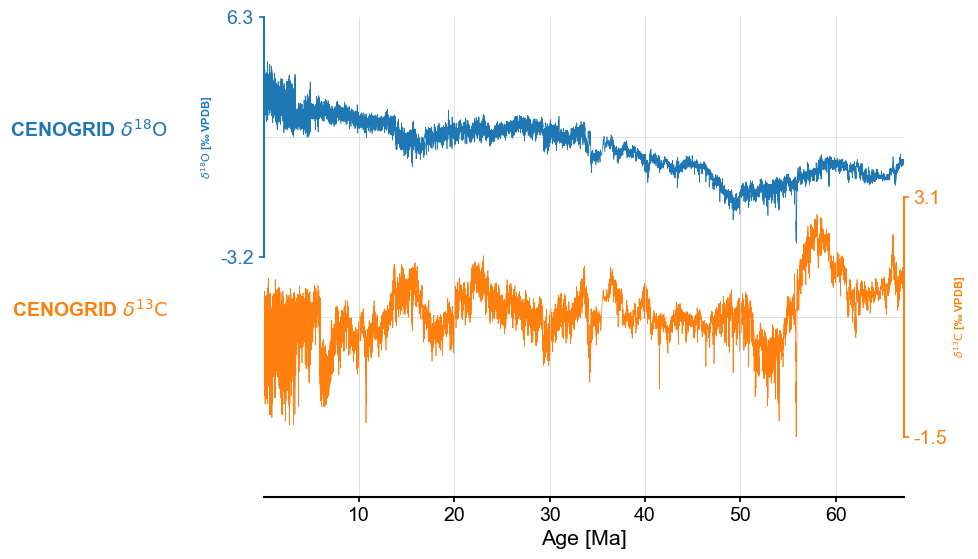

In [106]:
fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

def highlight_intervals(ax, intervals):
    if type(ax) == dict:
        if 'subplots_canvas' in ax:
            _ax = a
ax['subplots_canvas'].axvspan(10, 17, facecolor='g', alpha=0.5)

def add_geo_timescale(fig, ax, timescale_height = .025, offset=.01):
# bbox_coords =ax['subplots_canvas'].get_position()
    if type(ax) == dict:
        _ax = ax['subplots_canvas']
    else:
        _ax = ax
        ax = {'ax':ax}
    bbox_coords =ax.get_position()
    
    ll_sp = bbox_coords._points[0]
    ur_sp = bbox_coords._points[1]
    
    timescale_l = ll_sp[0]
    timescale_b = ur_sp[1]+offset
    timescale_width = ur_sp[0]-ll_sp[0]

ax['timescale'] = fig.add_axes([timescale_l, timescale_b, 
                                      timescale_width, timescale_height], 
                               **{'zorder':-1})
ax['timescale'] = make_phantom_ax(ax['timescale'])

geo_ts = [[10,0], [10, 25], [25, 30], [30,43], [43, 60], [60, 65]]
for ik, _ts in enumerate(geo_ts):
    if ik%2 ==0:
        c = 'r'
    else:
        c = 'b'
    ax['timescale'].axvspan(_ts[0], _ts[1], facecolor=c, alpha=0.5)


# Functions

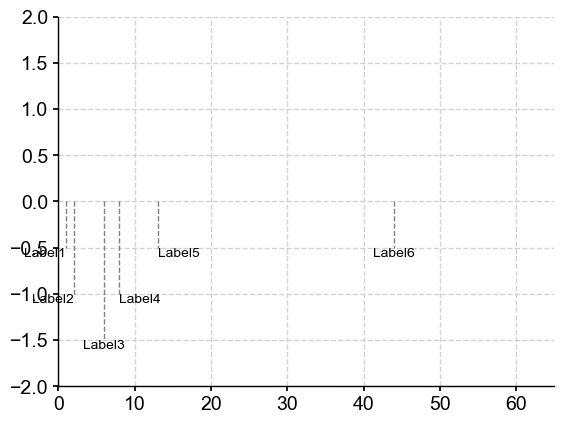

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

def calculate_overlapping_sets(ax, labels, x_locs, fontsize, buffer=.1):

    # Calculate the horizontal span of each label
    intervals = []
    for i, label in enumerate(labels):
        ann = ax.text(x_locs[i], 0, label, size=fontsize)
        box = ax.transData.inverted().transform(ann.get_tightbbox(fig.canvas.get_renderer()))
        w = box[1][0] - box[0][0]+buffer
        interval = pd.Interval(left=x_locs[i] - w / 2, right=x_locs[i] + w / 2)
        intervals.append(interval)
        ann.remove()


    # Group overlapping labels
    overlapping_sets = []
    for i, interval_i in enumerate(intervals):
        found = False
        for overlap_set in overlapping_sets:
            if any(interval_i.overlaps(intervals[j]) for j in overlap_set):
                overlap_set.add(i)
                found = True
                break
        if not found:
            overlapping_sets.append({i})

    # Convert sets to sorted lists
    return [sorted(list(s)) for s in overlapping_sets]

def label_intervals(ax, labels, x_locs, orientation='north', overlapping_sets=None, baseline=0.5, 
                                  height=0.5, buffer=0.1, fontsize=10, linewidth=None, linestyle_kwargs=None, 
                                  text_kwargs=None
                                      ):

    if linestyle_kwargs is None:
        linestyle_kwargs = {}

    linestyle_defaults = {'linestyle':'--', 'color':'gray', 'linewidth':1 if linewidth is None else linewidth}
    for key in linestyle_defaults:
        if key not in linestyle_kwargs:
            linestyle_kwargs[key] = linestyle_defaults[key]
    
    if text_kwargs is None:
        text_kwargs = {}

    text_defaults = {'fontsize':10 if fontsize is None else fontsize, 'ha':'center'}
    for key in text_defaults:
        if key not in text_kwargs:
            text_kwargs[key] = text_defaults[key]
    fontsize=text_kwargs['fontsize']


    # if overlapping sets aren't specified, calculate them
    if overlapping_sets is None:
        overlapping_sets = calculate_overlapping_sets(ax, labels, x_locs, fontsize, buffer=buffer)

    def get_label_width(label, fontsize=fontsize):
        text = ax.text(0, 0, label, size=fontsize)
        width = text.get_window_extent(renderer=ax.figure.canvas.get_renderer()).width
        text.remove()  # Remove the text used for measurement
        return width + buffer

    label_alignments = ['center' for _ in labels]
    label_slots = [0 for _ in labels]

    for overlap_set in overlapping_sets:
        if len(overlap_set) > 1:
            sorted_set = sorted(overlap_set, key=lambda i: x_locs[i])
            peak = len(sorted_set) // 2
            for i, label_index in enumerate(sorted_set):
                label_slots[label_index] = i if i <= peak else peak - (i - peak)

            cluster_min, cluster_max = x_locs[sorted_set[0]], x_locs[sorted_set[-1]]
            for i, label_index in enumerate(sorted_set):
                if i == 0:
                    label_alignments[label_index] = 'right'
                else:
                    if len(sorted_set) == 2:
                        label_alignments[label_index] = 'center'
                    else:
                        if i == int((len(sorted_set)-1)/2):
                            label_alignments[label_index] = 'center'
                        elif i > int((len(sorted_set)-1)/2):
                            label_alignments[label_index] = 'left'
                        else:
                            label_width = get_label_width(labels[label_index])
                            if x_locs[label_index] - label_width / 2 < cluster_min:
                                label_alignments[label_index] = 'right'
                            elif x_locs[label_index] + label_width / 2 > cluster_max:
                                label_alignments[label_index] = 'left'
                            else:
                                label_alignments[label_index] = 'center'

        else:
            label_index = overlap_set[0]
            label_alignments[label_index] = 'center'

    for i, label in enumerate(labels):
        label_text_kwargs = text_kwargs.copy()
        slot_height = baseline + label_slots[i] * height if orientation == 'north' else -baseline - label_slots[i] * height

        label_text_kwargs['ha']=label_alignments[i]
        if 'va' not in label_text_kwargs:
            label_text_kwargs['va'] = 'bottom' if orientation == 'north' else 'top'

        ax.text(x_locs[i], slot_height, label, **label_text_kwargs)
        ax.plot([x_locs[i], x_locs[i]], [0, slot_height], **linestyle_kwargs)

    return ax

# Example usage
fig, ax = plt.subplots()
ax.set_xlim([0, 65])
ax.set_ylim([-2, 2])  # Adjust as needed
labels = ["Label1", "Label2", "Label3", "Label4", "Label5", "Label6"]
x_locs = [1, 2, 6, 8, 13, 44]
fontsize = 12

# Place labels above the baseline (north)
ax = pyleo.utils.plotting.label_intervals(fig, ax, labels, x_locs, orientation='south', 
                                   linestyle_kwargs= {'color':'gray'}, text_kwargs={'fontsize':10, 'va':'top'}
                                  )



# LR04

In [570]:
import matplotlib as mpl
from matplotlib.lines import Line2D
colors_codes, unculled_labels = [],[]
for _ax in fig.get_axes():
    for c in _ax.get_children():
        if isinstance(c, mpl.legend.Legend):
            _handles, _labels = _ax.get_legend_handles_labels()
            colors_codes+=[_handle._color for _handle in _handles]
            unculled_labels +=_labels

for ik, color in enumerate(colors):
    label = colors[ik]
    unculled_labels.append(label)
    colors_codes.append(colors[ik])

hl_tuples = list(zip(colors_codes, unculled_labels))

hl_tuples_culled = []
for hl_tuple in hl_tuples:
    if hl_tuple not in hl_tuples_culled:
        hl_tuples_culled.append(hl_tuple)

colors_codes, culled_labels = map(list,zip(*hl_tuples_culled))

revised_handles, revised_labels = [], []
for ik, color in enumerate(colors_codes):
    revised_handles.append(Line2D([0], [0], color=color, alpha=0.4, lw=4, label=culled_labels[ik]))
    revised_labels.append(culled_labels[ik])

## Plotting

In [5]:
LR04 = pyleo.utils.load_dataset('LR04')
# MIS_intervals = [[]]
# Read data from the URL
MIS_df = pd.read_csv('https://lorraine-lisiecki.com/LR04_MISboundaries.txt', sep='\t', nrows=25, skiprows=1)

# Selecting the relevant columns
cols = MIS_df.columns
MIS_bounds = MIS_df[[cols[0]]].replace(np.nan, 0, inplace=False).astype(float) + MIS_df[[cols[1]]].replace(np.nan, 0, inplace=False).astype(float).values
MIS_bounds.reset_index(inplace=True)
MIS_bounds.columns = ['boundary', 'Age']

# Filtering out rows with 'peak' in the boundary column
filtered_df = MIS_bounds[~MIS_bounds['boundary'].str.contains('peak', na=False)]

# Prepending a 0 to the Age column for the first interval
filtered_ages = [0] + filtered_df['Age'].tolist()

# Creating intervals
intervals = [[start, end] for start, end in zip(filtered_ages, filtered_ages[1:])]

# Creating interval labels
interval_labels = [f"{i+1}" for i in range(len(intervals))]

peaks = MIS_bounds[MIS_bounds['boundary'].str.contains('peak', na=False)]
peak_labels = ['5{}'.format('abcdefg'[ik]) for ik in range(len(peaks['Age']))]
peak_locs = peaks['Age']

# # Calculate the absolute year difference
peak_idx = [pd.Series(abs(LR04.time - specified_year)).idxmin() for specified_year in peak_locs]
peak_values = [LR04.value[idx] for idx in peak_idx]

/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


2.5162337662337664


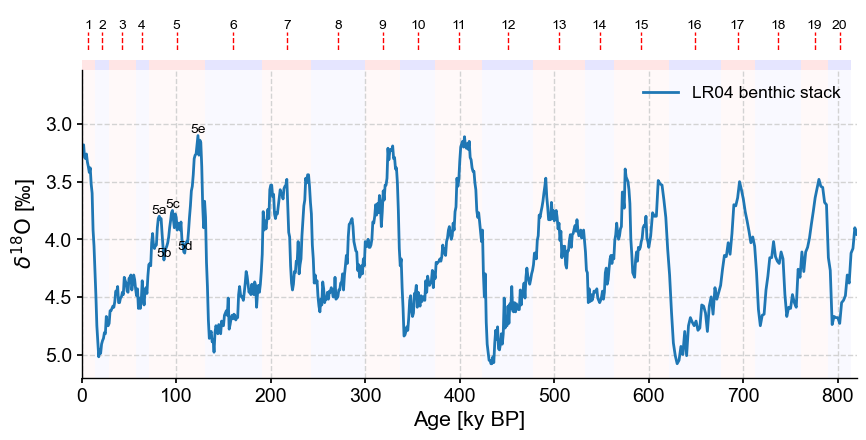

In [6]:

fig, ax = LR04.plot(xlim=[0,820], invert_yaxis=True)
ax.set_facecolor((1, 1, 1, 0))
old_handles, old_labels = ax.get_legend_handles_labels()
intervals_x = [[start, end] for start, end in zip(LR04.time, LR04.time[1:])]
intervals_y = [[start, end] for start, end in zip(LR04.value, LR04.value[1:])]

margin=.00125
min_distance=margin+.0215205
max_distance = min_distance+.001
ta.allocate_text(fig,ax,
                 peak_locs,peak_values,
                peak_labels,
            x_scatter=LR04.time, y_scatter=LR04.value,
            x_lines=intervals_x, y_lines=intervals_y,
            max_distance=max_distance,#0.842,
            min_distance=min_distance, #0.04,
            margin=margin, #0.02839,
            linewidth=0.5,
                 draw_all=True,
            nbr_candidates=400, 
                 **dict(horizontalalignment="center", va='bottom')
                )
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'highlighted_intervals', loc='overlay',zorder=-200)#, v_offset=.0150,)
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'highlighted_bands', loc='above',zorder=-200)#, v_offset=.0150,)

colors = ['r' if ik%2 ==0 else 'b' for ik, _ts in enumerate(intervals)]

ax['highlighted_intervals'] = pyleo.utils.plotting.hightlight_intervals(ax['highlighted_intervals'], intervals,
         color=colors, alpha=.0251)
ax['highlighted_bands'] = pyleo.utils.plotting.hightlight_intervals(ax['highlighted_bands'], intervals,
         color=colors, alpha=.1)

height = .1
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'annotation_intervals', 
                                           zorder=-1, v_offset=.050,
                                           height=height, loc='above')
ylims=[0,1]
ax['annotation_intervals'].set_ylim(ylims)

x_locs = [np.mean(interval) for interval in intervals]
labels = [str(ik+1) for ik in range(len(x_locs))]
ax['annotation_intervals'] = pyleo.utils.plotting.label_intervals(fig, ax['annotation_intervals'], labels, x_locs, 
                                                       orientation='north', baseline=.45, height=0.35, buffer=0.1,
                                   linestyle_kwargs= {'color':'red'}, text_kwargs={'fontsize':10, 'va':'bottom'}
                                  )


# ax[0].invert_yaxis()
# margin=10.18
# min_distance=margin+.0215205
# max_distance = -100+min_distance+11
# ta.allocate_text(fig,ax[0],
#                  peak_locs,peak_values,
#                 peak_labels,
#                  scatter_sizes=[100 for ik in range(len(LR04.value))],
#             x_scatter=LR04.time, y_scatter=LR04.value,
#             x_lines=intervals_x, y_lines=intervals_y,
#             max_distance=max_distance,#0.842,
#             min_distance=max_distance, #0.04,
#             margin=margin, #0.02839,
#             linewidth=0.5,
#                  draw_all=True,
#             nbr_candidates=400, 
#                  **dict(horizontalalignment="center",va='bottom')
#                 )

# import matplotlib as mpl
# from matplotlib.lines import Line2D

# # revised_handles, revised_labels = [], []
# # for _ax in fig.get_axes():
# #     for c in _ax.get_children():
# #         if isinstance(c, mpl.legend.Legend):
# #             _handles, _labels = _ax.get_legend_handles_labels()
# #             revised_handles += _handles
# #             revised_labels += _labels
# #             colors_codes+=[_handle._color for _handle in _handles]
# #             unculled_labels +=_labels
# colors_codes, unculled_alphas, unculled_labels = [],[], []

# for _ax in fig.get_axes():
#     for c in _ax.get_children():
#         for p in c:
#             #     unculled_labels.append(label)
# #     colors_codes.append(colors[ik])
# #     unculled_alphas.append(alpha[ik])
            
#         if isinstance(c, mpl.legend.Legend):
#             _handles, _labels = _ax.get_legend_handles_labels()
#             colors_codes+=[_handle._color for _handle in _handles]
#             unculled_alphas+=[_handle._alpha for _handle in _handles]
#             unculled_labels +=_labels

# # for ik, color in enumerate(colors):
# #     label = colors[ik]
# #     unculled_labels.append(label)
# #     colors_codes.append(colors[ik])
# #     unculled_alphas.append(alpha[ik])

# hl_tuples = list(zip(colors_codes, unculled_labels))

# hl_tuples_culled = []
# for hl_tuple in hl_tuples:
#     if hl_tuple not in hl_tuples_culled:
#         hl_tuples_culled.append(hl_tuple)

# colors_codes, culled_labels = map(list,zip(*hl_tuples_culled))

# revised_handles, revised_labels = [], []
# for ik, color in enumerate(colors_codes):
#     revised_handles.append(Line2D([0], [0], color=color, alpha=0.4, lw=4, label=culled_labels[ik]))
#     revised_labels.append(culled_labels[ik])


# # new_handles, new_labels = ax['highlighted_bands'].get_legend_handles_labels()
# # ax[0].get_legend().remove()
# # ax[0].legend(handles=old_handles + new_handles, labels=old_labels+new_labels)

# ax[0].legend(revised_handles,revised_labels, facecolor='white')
# # ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
# # ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

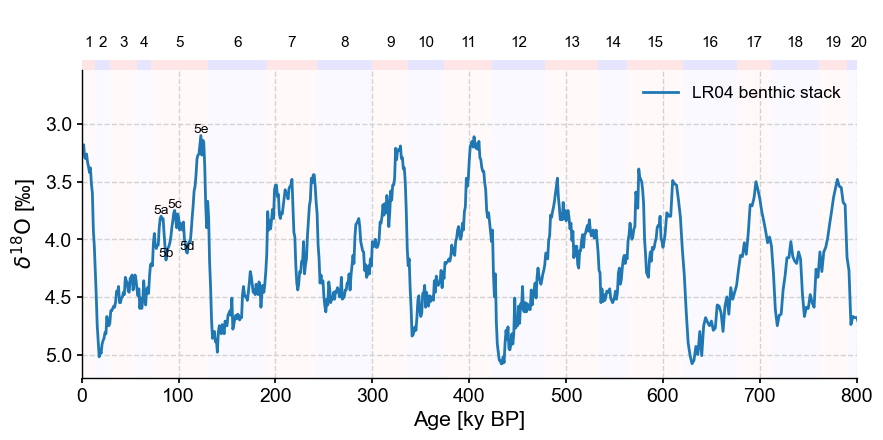

In [9]:

fig, ax = LR04.plot(xlim=[0,800], invert_yaxis=True)
ax.set_facecolor((1, 1, 1, 0))

ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'highlighted_intervals', loc='overlay',zorder=-2)#, v_offset=.0150,)
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'highlighted_bands', loc='above',zorder=-2)#, v_offset=.0150,)

colors = ['r' if ik%2 ==0 else 'b' for ik, _ts in enumerate(intervals)]

ax['highlighted_intervals'] = pyleo.utils.plotting.hightlight_intervals(ax['highlighted_intervals'], intervals,
         color=colors, alpha=.0251)
ax['highlighted_bands'] = pyleo.utils.plotting.hightlight_intervals(ax['highlighted_bands'], intervals,
         color=colors, alpha=.1)

height = .1
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'annotation_intervals', 
                                           zorder=0, v_offset=.050,
                                           height=height, loc='above')
ylims=[0,1]
ax['annotation_intervals'].set_ylim(ylims)

x_locs = [np.mean(interval) for interval in intervals]
anotate_locations(ax, x_locs, interval_labels, loc='below',ax_name='annotation_intervals' ,fontsize=11, levels=None, 
                  scaler=-.2, min_offset=1.2)

intervals_x = [[start, end] for start, end in zip(LR04.time, LR04.time[1:])]
intervals_y = [[start, end] for start, end in zip(LR04.value, LR04.value[1:])]

margin=.008
min_distance=margin+.0215205
max_distance = min_distance+.021
ta.allocate_text(fig,ax[0],
                 peak_locs,peak_values,
                peak_labels,
            x_scatter=LR04.time, y_scatter=LR04.value,
            x_lines=intervals_x, y_lines=intervals_y,
            max_distance=max_distance,#0.842,
            min_distance=min_distance, #0.04,
            margin=margin, #0.02839,
            linewidth=0.5,
                 draw_all=True,
            nbr_candidates=400, 
                 **dict(horizontalalignment="center", va='bottom')
                )
                 
# ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
# ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

# Ceno epochs

In [7]:
timescales_df = pd.read_csv('https://pubs.usgs.gov/of/2006/1292/CSV/agelist.csv')
epoch_df = timescales_df[['EPOCH', 'MIN_Ma', 'MAX_Ma']].dropna().drop_duplicates()
ceno_epoch_df = epoch_df[epoch_df['MAX_Ma']<67]
ceno_epoch_df = ceno_epoch_df[~ceno_epoch_df['EPOCH'].str.contains('Early', na=False)]
ceno_epoch_df = ceno_epoch_df[~ceno_epoch_df['EPOCH'].str.contains('Late', na=False)]
ceno_epoch_df

# Load the data
timescales_df = pd.read_csv('https://pubs.usgs.gov/of/2006/1292/CSV/agelist.csv')

# Selecting the required columns and dropping NaNs and duplicates
epoch_df = timescales_df[['EPOCH', 'MIN_Ma', 'MAX_Ma']].dropna().drop_duplicates()

epoch_df = epoch_df[~epoch_df['EPOCH'].str.contains('Early', na=False)]
epoch_df = epoch_df[~epoch_df['EPOCH'].str.contains('Late', na=False)]
epoch_df = epoch_df[~epoch_df['EPOCH'].str.contains('Middle', na=False)]
# Calculate the difference between MIN_Ma and MAX_Ma
epoch_df['Ma_diff'] = epoch_df['MAX_Ma'] - epoch_df['MIN_Ma']

# Group by EPOCH and find the row with the maximum difference
epoch_df = epoch_df.loc[epoch_df.groupby('EPOCH')['Ma_diff'].idxmax()]

# Dropping the Ma_diff column as it's no longer needed
epoch_df = epoch_df.drop(columns='Ma_diff')

# Filtering for epochs with MAX_Ma < 67
ceno_epoch_df = epoch_df[epoch_df['MAX_Ma'] < 67].copy()

# Sort by end date
ceno_epoch_df = ceno_epoch_df.sort_values(by='MIN_Ma')

In [8]:
ceno_epoch_df['Ma_mean'] = np.mean([ceno_epoch_df['MAX_Ma'], ceno_epoch_df['MIN_Ma']], axis=0)

## JPL branch

## CKjell main (post issues)

In [334]:
from matplotlib.path import get_path_collection_extents


def getbb(sc, ax):
    """ Function to return a list of bounding boxes in data coordinates
        for a scatter plot """
    ax.figure.canvas.draw() # need to draw before the transforms are set.
    transform = sc.get_transform()
    transOffset = sc.get_offset_transform()
    offsets = sc._offsets
    paths = sc.get_paths()
    transforms = sc.get_transforms()

    if not transform.is_affine:
        paths = [transform.transform_path_non_affine(p) for p in paths]
        transform = transform.get_affine()
    if not transOffset.is_affine:
        offsets = transOffset.transform_non_affine(offsets)
        transOffset = transOffset.get_affine()

    if isinstance(offsets, np.ma.MaskedArray):
        offsets = offsets.filled(np.nan)

    bboxes = []

    if len(paths) and len(offsets):
        if len(paths) < len(offsets):
            # for usual scatters you have one path, but several offsets
            paths = [paths[0]]*len(offsets)
        if len(transforms) < len(offsets):
            # often you may have a single scatter size, but several offsets
            transforms = [transforms[0]]*len(offsets)

        for p, o, t in zip(paths, offsets, transforms):
            result = get_path_collection_extents(
                transform.frozen(), [p], [t],
                [o], transOffset.frozen())
            # bboxes.append(result.inverse_transformed(ax.transData))
            bboxes.append(result.transformed(ax.transData.inverted()).bounds)

    return bboxes

# ax[1].get_children()[0].__dict__#__dict__#['_get_patches_for_fill'].__dict__

array([[ 2.08062792e+01,  4.68008392e+00,  1.45559718e+02,
         6.20988368e-01],
       [ 3.48907631e+02,  6.21059256e+00,  3.01665102e+02,
         1.28696677e+00],
       [ 8.77186973e+03,  5.60121666e+00,  4.09405060e+02,
         1.74660809e+00],
       [ 7.01472472e+03,  7.47469245e+00,  3.93249133e+02,
         1.67768351e+00],
       [ 8.20467068e+03,  9.01103583e+00,  2.62250328e+02,
         1.11881505e+00],
       [ 4.77826553e+03,  2.66936645e+00,  3.40221530e+02,
         1.45145660e+00],
       [ 9.58883772e+03,  1.68858915e-01,  3.72917322e+02,
         1.59094372e+00],
       [ 2.73750327e+03,  2.18687547e+00,  3.74982939e+02,
         1.59975608e+00],
       [-1.43193348e+01,  4.38005119e+00,  4.01913224e+02,
         1.71464634e+00],
       [ 3.73943559e+03,  1.48628383e+00,  2.97985622e+02,
         1.27126933e+00],
       [ 5.43320323e+03,  2.58336768e+00,  4.27041901e+02,
         1.82185056e+00],
       [ 2.48898149e+02,  7.39106611e+00,  2.58604576e+02,
      

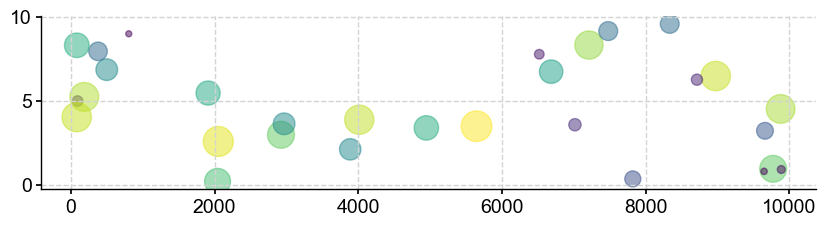

In [336]:
fig, ax = plt.subplots(1, 1, figsize=(10,2.25))
sc = ax.scatter(scatter_data[:, 0]*scale, scatter_data[:, 1], c=scatter_data[:, 2], s=scatter_data[:, 2] * 50, zorder=-1,alpha=0.5)
bboxes = getbb(sc, ax)
np.array(bboxes)

[145.55971772   0.27944477]
[301.66510191   0.57913505]
[409.40505956   0.78597364]
[393.24913331   0.75495758]
[262.25032818   0.50346677]
[340.22152964   0.65315547]
[372.91732214   0.71592468]
[374.98293894   0.71989024]
[401.91322378   0.77159085]
[297.98562222   0.5720712 ]
[427.04190131   0.81983275]
[258.60457561   0.49646768]
[263.89047428   0.50661552]
[89.06556522  0.17098759]
[302.67531637   0.58107445]
[326.96564918   0.6277069 ]
[84.69672872  0.16260033]
[223.44519052   0.42896888]
[417.46221842   0.80144173]
[408.75162826   0.78471918]
[360.93945626   0.69292963]
[335.74198193   0.64455566]
[109.60454719   0.21041822]
[399.45904957   0.76687934]
[406.52953637   0.78045322]
[134.16706987   0.25757322]
[234.05851203   0.44934428]
[171.92115182   0.33005331]
[342.14282424   0.65684396]
[156.24285892   0.2999542 ]
[145.55971772   0.61477848]
[301.66510191   1.2740971 ]
[409.40505956   1.729142  ]
[393.24913331   1.66090667]
[262.25032818   1.1076269 ]
[340.22152964   1.436942

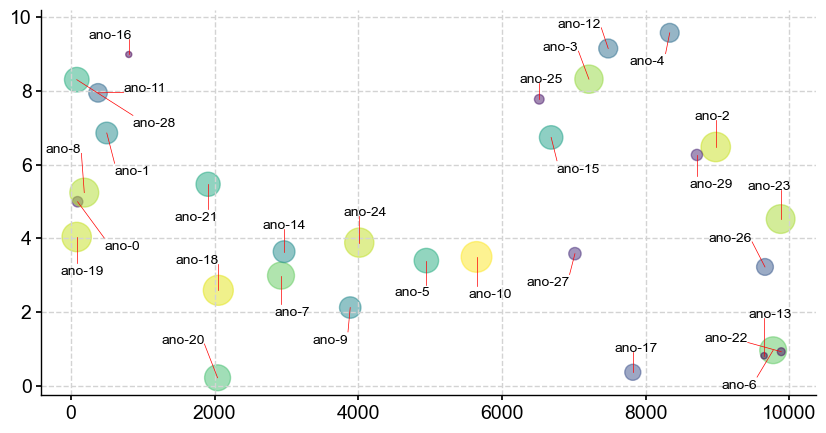

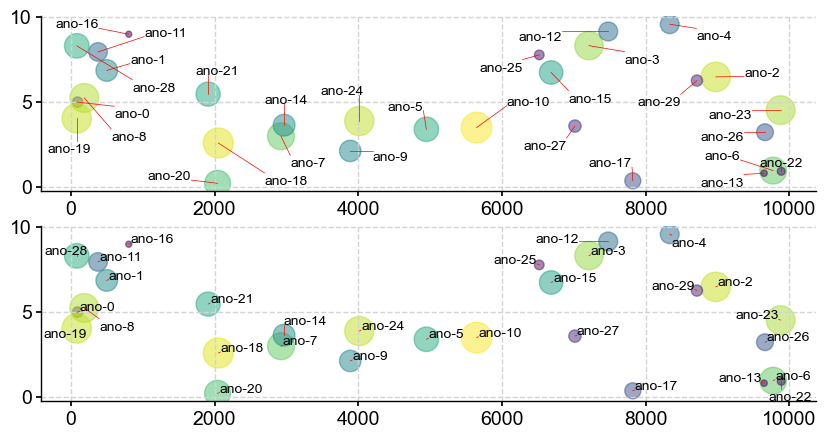

In [367]:
import textalloc as ta
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)
N = 30
scatter_data = np.random.rand(N, 3)*10
scale = 1000
min_distace = 0.0025
margin=.015

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sc=ax.scatter(scatter_data[:, 0]*scale, scatter_data[:, 1], c=scatter_data[:, 2], s=scatter_data[:, 2] * 50, zorder=-1,alpha=0.5)
labels = ['ano-{}'.format(i) for i in range(N)]
text_list = labels = ['ano-{}'.format(i) for i in range(N)]
ta.allocate_text(fig,ax,scatter_data[:, 0]*scale,scatter_data[:, 1],
            text_list,
                 # scatter_sizes = scatter_data[:, 2] * 50,
            x_scatter=scatter_data[:, 0]*scale, y_scatter=scatter_data[:, 1],
            max_distance=min_distace+.1,
            min_distance=min_distace,
            margin=margin,
            linewidth=0.5,
            nbr_candidates=400, 
                 seed=0,
                 sc=sc
                # mode='south'
                )

fig, ax = plt.subplots(2, 1, figsize=(10,5))
sc = ax[0].scatter(scatter_data[:, 0]*scale, scatter_data[:, 1], c=scatter_data[:, 2], s=scatter_data[:, 2] * 50, zorder=-1,alpha=0.5)
labels = ['ano-{}'.format(i) for i in range(N)]
text_list = labels = ['ano-{}'.format(i) for i in range(N)]
ta.allocate_text(fig,ax[0],scatter_data[:, 0]*scale,scatter_data[:, 1],
            text_list,
                 # scatter_sizes = scatter_data[:, 2] * 50,
            x_scatter=scatter_data[:, 0]*scale, y_scatter=scatter_data[:, 1],
            max_distance=min_distace+.1,
            min_distance=min_distace,
            margin=margin,
            linewidth=0.5,
            nbr_candidates=400, 
                 seed=0,
                 sc=sc
                # mode='south'
                )
sc = ax[1].scatter(scatter_data[:, 0]*scale, scatter_data[:, 1], c=scatter_data[:, 2], s=scatter_data[:, 2] * 50, zorder=-1,alpha=0.5)
labels = ['ano-{}'.format(i) for i in range(N)]
text_list = labels = ['ano-{}'.format(i) for i in range(N)]
ta.allocate_text(fig,ax[1],scatter_data[:, 0]*scale,scatter_data[:, 1],
            text_list,
                 scatter_sizes = scatter_data[:, 2] * 50,
            x_scatter=scatter_data[:, 0]*scale, y_scatter=scatter_data[:, 1],
            max_distance=min_distace+.1,
            min_distance=min_distace,
            margin=margin,
            linewidth=0.5,
            nbr_candidates=400, 
                 seed=0,
                 # sc=sc
                # mode='south'
                )

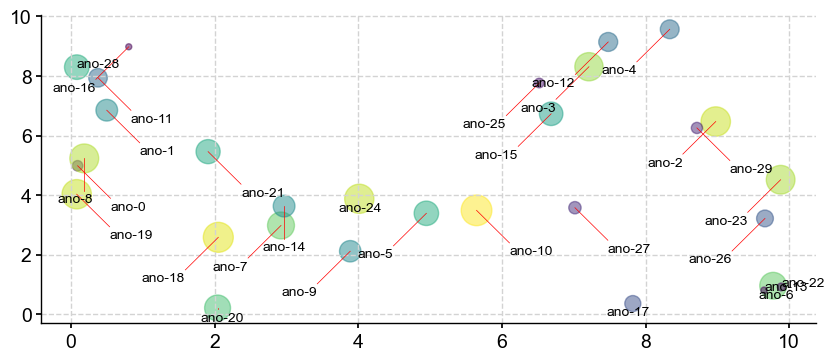

In [303]:
import textalloc as ta
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)
N = 30
scatter_data = np.random.rand(N, 3)*10
scale = 1
min_distace = 0.0425
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(scatter_data[:, 0]*scale, scatter_data[:, 1], c=scatter_data[:, 2], s=scatter_data[:, 2] * 50, zorder=-1,alpha=0.5)
labels = ['ano-{}'.format(i) for i in range(N)]
text_list = labels = ['ano-{}'.format(i) for i in range(N)]
ta.allocate_text(fig,ax,scatter_data[:, 0]*scale,scatter_data[:, 1],
            text_list,
                 scatter_sizes = scatter_data[:, 2] * 50,
            x_scatter=scatter_data[:, 0]*scale, y_scatter=scatter_data[:, 1],
            max_distance=min_distace,
            min_distance=min_distace,
            margin=0.015,
            linewidth=0.5,
            nbr_candidates=400, 
                 seed=0,
                mode='south'
                )

[0, 1, 2]
0
1
2
[3]
[4]
[5]
[6]


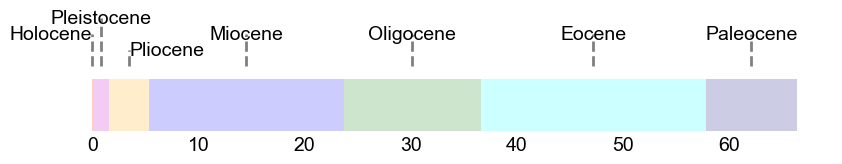

In [646]:

colors = color=['r', 'm', 'orange', 'blue', 'green', 'aqua', 'navy', 'pink']#['r', 'b']#'r' if ik%2 ==0 else 'b' for ik, _ts in enumerate(geo_ts)]
ceno_intervals_pairs = [[0.0, 0.01],[0.01, 1.6], [1.6, 5.3],[5.3, 23.7],[23.7, 36.6],[36.6, 57.8],[57.8, 66.4]]
x_locs = np.array([5.000e-03, 8.050e-01, 3.450e+00, 1.450e+01, 3.015e+01, 4.720e+01, 6.210e+01])
labels = np.array(['Holocene', 'Pleistocene', 'Pliocene', 'Miocene', 'Oligocene', 'Eocene', 'Paleocene'], dtype=object)
y_locs = np.array([-.1 for x_loc in x_locs])
fig, ax = plt.subplots(2, 1, figsize=(10,1.5))
for ik, _ts in enumerate(ceno_intervals_pairs):
    c = color[ik]
    a = .2

    ax[1].axvspan(_ts[0], _ts[1], facecolor=c, alpha=a)

for ip in [0,1]:
    ax[ip].grid(False)
    for side in ['left', 'right', 'bottom']:
        ax[ip].spines[side].set_visible(False)
    
    ax[ip].set_yticks([])
    ax[ip].tick_params(axis='x', which='both', length=0)
    ax[ip].set_xlabel('')
    ax[ip].set_ylabel('')
    ax[ip].set_yticklabels([])
xlim = ax[1].get_xlim()
ax[0].set_xlim(xlim)
ax[0].set_xticklabels([])

overlapping_sets = calculate_overlapping_sets(ax[0], labels, x_locs, fontsize)
place_labels_final_adjustment(ax[0], labels, x_locs, overlapping_sets)

# min_distance=.12
# margin=0
# ta.allocate_text(fig,ax[0],
#                  x_locs,y_locs,
#                 labels,
#                 min_distance=min_distance,#[xmin_distance,ymin_distance], #0.04,
#                 max_distance=min_distance+.0515,#[xmin_distance+40,ymin_distance +10],#0.842,
#                 margin=margin,
#                 linewidth=0.5,
#                 draw_all=True,
#                 seed=3,
#                 mode='north',
#                  **dict( va='bottom', ha='center')
#                 )

## ChatGPT to the rescue (Ceno)

In [13]:
ceno_epoch_df['EPOCH'].values

array(['Holocene', 'Pleistocene', 'Pliocene', 'Miocene', 'Oligocene',
       'Eocene', 'Paleocene'], dtype=object)

/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(
/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


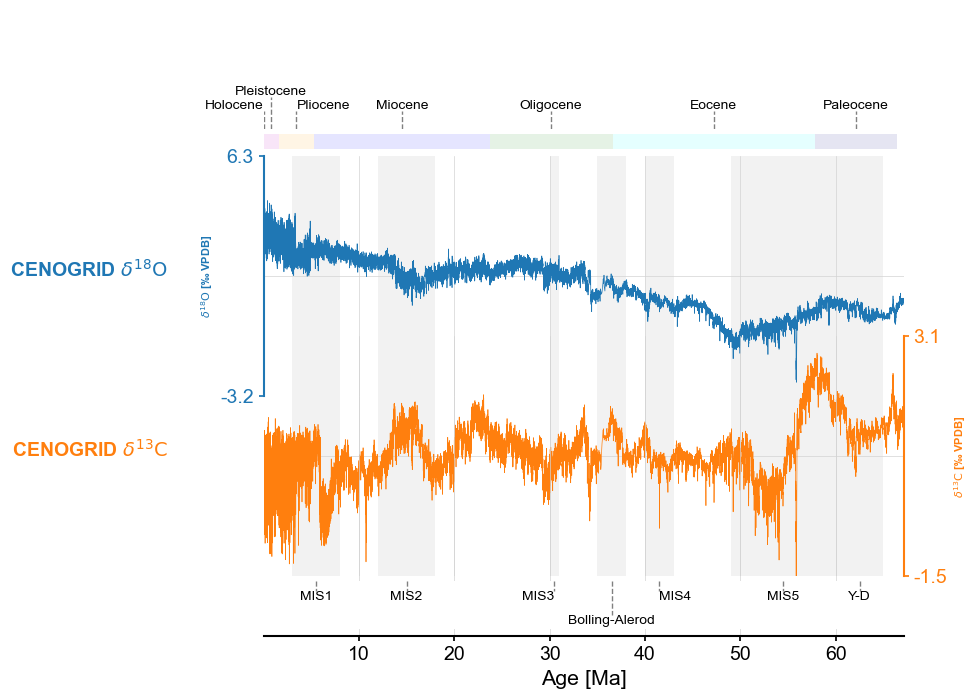

In [14]:
##### import pyleoclim as pyleo
import numpy as np
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

####################################################
### Intervals
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, 
                                           ax_name = 'highlighted_intervals', 
                                           loc='overlay', zorder=-1)
intervals = [[3, 8], [12, 18], [30, 31], [35,38], [40,43], [49, 60], [60, 65]]
ax['highlighted_intervals'] = pyleo.utils.plotting.hightlight_intervals(ax['highlighted_intervals'], intervals,
         color='gray', alpha=.1)

### Intervals (labels)
height = .1
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'annotation_intervals', 
                                           zorder=1, v_offset=-0.01,
                                           height=height, loc='below')

ylims=[-1,0]
ax['annotation_intervals'].set_ylim(ylims)
labels = ['MIS1', 'MIS2', 'MIS3', 'Bolling-Alerod', 'MIS4', 'MIS5', 'Y-D']
x_locs = [np.mean(interval) for interval in intervals]
ax['annotation_intervals'] = pyleo.utils.plotting.label_intervals(fig, ax['annotation_intervals'], labels, x_locs, 
                                                       orientation='south', baseline=0.21,#height=0.25, buffer=0.1,
                                   linestyle_kwargs= {'color':'gray'}, text_kwargs={'fontsize':10, 'va':'top'}
                                  )

####################################################
### EPOCHS (colors)

height=.03
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'epochs', height=height,
                                           loc='above', v_offset=.015,zorder=-2)
ax['epochs'].set_facecolor((1, 1, 1, 0))

ceno_intervals_pairs = [[0.0, 0.01], [0.01, 1.6], [1.6, 5.3], [5.3, 23.7], [23.7, 36.6], [36.6, 57.8], [57.8, 66.4]]
ceno_epoch_labels = ['Holocene', 'Pleistocene', 'Pliocene', 'Miocene', 'Oligocene', 'Eocene', 'Paleocene']
# [[row['MIN_Ma'], row['MAX_Ma']] for index, row in ceno_epoch_df.iterrows()]
ylims=[-1,0]
ax['epochs'].set_ylim(ylims)

# era_labels=['era {}'.format(ik) for ik in range(len(geo_ts))]
colors = ['r', 'm', 'orange', 'blue', 'green', 'aqua', 'navy', 'pink']#['r', 'b']#'r' if ik%2 ==0 else 'b' for ik, _ts in enumerate(geo_ts)]
ax['epochs'] = pyleo.utils.plotting.hightlight_intervals(ax['epochs'],
                                            ceno_intervals_pairs, color=colors, 
                                                                      alpha=.1)

### EPOCHS (labels)
height=.25
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax['epochs'], ax_name = 'epoch_annotation', 
                                           zorder=1, v_offset=0.01,
                                           height=height, loc='above')

x_locs = [np.mean(interval) for interval in ceno_intervals_pairs]
ylims = [0,3]
ax['epoch_annotation'].set_ylim(ylims)
labels = ceno_epoch_df['EPOCH'].values
ax['epoch_annotation'] = pyleo.utils.plotting.label_intervals(fig, ax['epoch_annotation'], ceno_epoch_labels, x_locs, 
                                                       orientation='north', baseline=.45, height=0.35, buffer=0.1,
                                   linestyle_kwargs= {'color':'gray'}, text_kwargs={'fontsize':10, 'va':'bottom'}
                                  )


/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(
/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


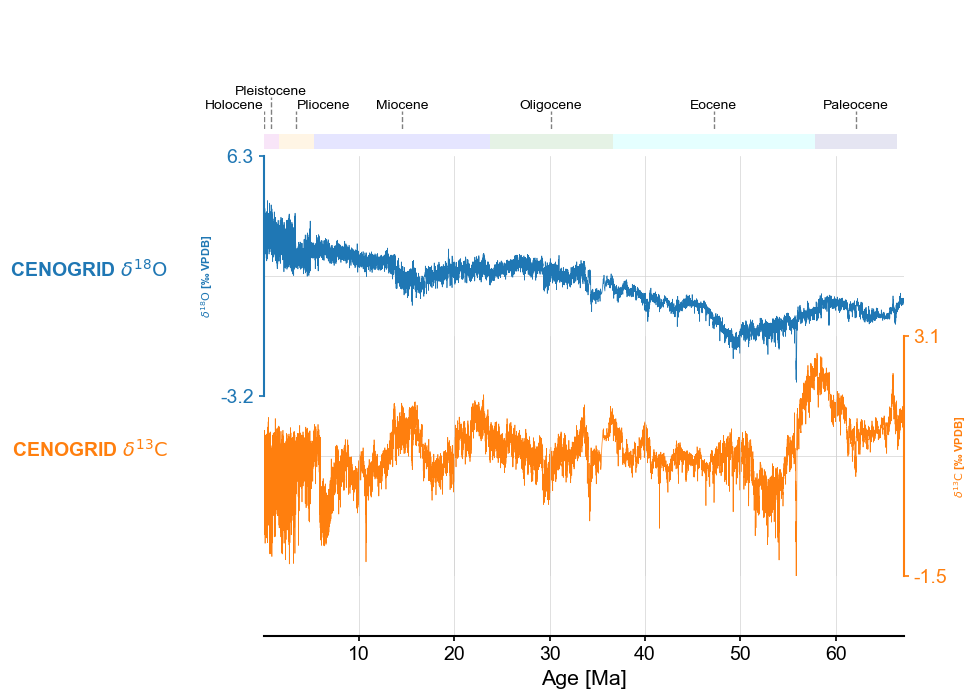

In [19]:
##### import pyleoclim as pyleo
import numpy as np
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

####################################################
### EPOCHS (colors)

ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'epochs', height=.03,
                                           loc='above', v_offset=.015,zorder=-2)
ax['epochs'].set_facecolor((1, 1, 1, 0))

ceno_intervals_pairs = [[0.0, 0.01], [0.01, 1.6], [1.6, 5.3], [5.3, 23.7], [23.7, 36.6], [36.6, 57.8], [57.8, 66.4]]
ceno_epoch_labels = ['Holocene', 'Pleistocene', 'Pliocene', 'Miocene', 'Oligocene', 'Eocene', 'Paleocene']
ax['epochs'].set_ylim([-1,0])

colors = ['r', 'm', 'orange', 'blue', 'green', 'aqua', 'navy', 'pink']#['r', 'b']#'r' if ik%2 ==0 else 'b' for ik, _ts in enumerate(geo_ts)]
ax['epochs'] = pyleo.utils.plotting.hightlight_intervals(ax['epochs'],
                                            ceno_intervals_pairs, color=colors, 
                                                                      alpha=.1)

### EPOCHS (labels)
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax['epochs'], ax_name = 'epoch_annotation', 
                                           zorder=1, v_offset=0.01,
                                           height=.25, loc='above')

x_locs = [np.mean(interval) for interval in ceno_intervals_pairs]
ax['epoch_annotation'].set_ylim( [0,3])
labels = ceno_epoch_df['EPOCH'].values
ax['epoch_annotation'] = pyleo.utils.plotting.label_intervals(fig, ax['epoch_annotation'], ceno_epoch_labels, x_locs, 
                                                       orientation='north', baseline=.45, height=0.35, buffer=0.1,
                                   linestyle_kwargs= {'color':'gray'}, text_kwargs={'fontsize':10, 'va':'bottom'}
                                  )

plt.savefig('ceno_annotated.png', bbox_inches='tight')


/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(
/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


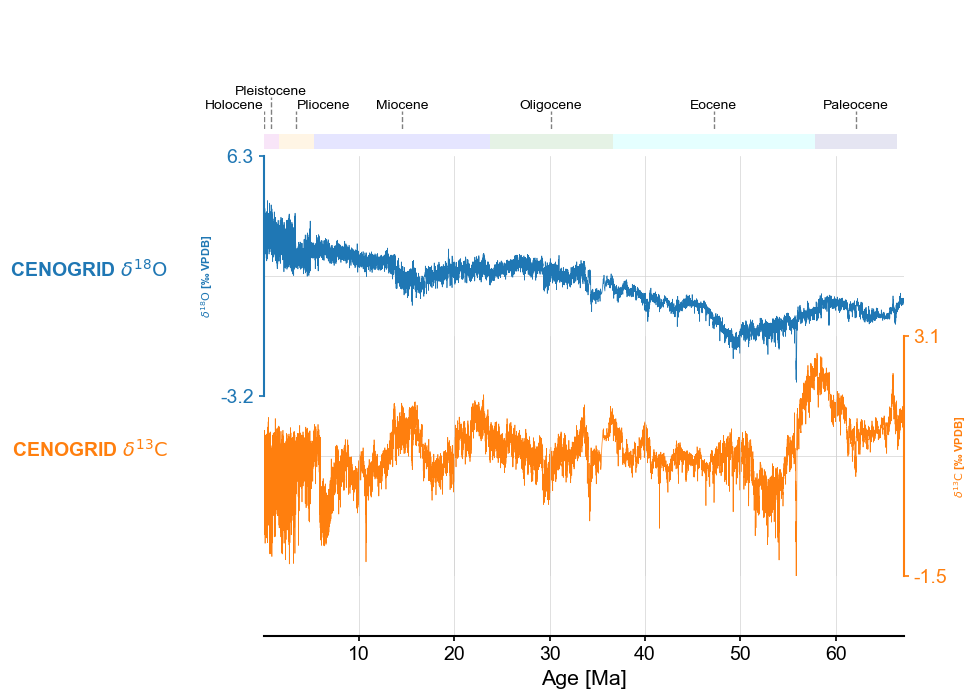

In [22]:
import pyleoclim as pyleo
import numpy as np

ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'epochs', height=.03,
                                   loc='above', v_offset=.015,zorder=-2)
# ax['epochs'].set_facecolor((1, 1, 1, 0))

ceno_intervals_pairs = [[0.0, 0.01], [0.01, 1.6], [1.6, 5.3], [5.3, 23.7], [23.7, 36.6], [36.6, 57.8], [57.8, 66.4]]
ceno_epoch_labels = ['Holocene', 'Pleistocene', 'Pliocene', 'Miocene', 'Oligocene', 'Eocene', 'Paleocene']
ax['epochs'].set_ylim([-1,0])

colors = ['r', 'm', 'orange', 'blue', 'green', 'aqua', 'navy', 'pink']#['r', 'b']#'r' if ik%2 ==0 else 'b' for ik, _ts in enumerate(geo_ts)]
ax['epochs'] = pyleo.utils.plotting.hightlight_intervals(ax['epochs'],
                                            ceno_intervals_pairs, color=colors,
                                                                      alpha=.1)

### EPOCHS (labels)
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax['epochs'], ax_name = 'epoch_annotation',
                                           zorder=1, v_offset=0.01,
                                           height=.25, loc='above')

x_locs = [np.mean(interval) for interval in ceno_intervals_pairs]
ax['epoch_annotation'].set_ylim([0,3])
ax['epoch_annotation'] = pyleo.utils.plotting.label_intervals(fig, ax['epoch_annotation'], ceno_epoch_labels, x_locs,
                                                       orientation='north', baseline=.45, height=0.35, buffer=0.1,
                                   linestyle_kwargs= {'color':'gray'}, text_kwargs={'fontsize':10, 'va':'bottom'}
                                  )


## CKjell main (pre issues)

In [ ]:
## import pyleoclim as pyleo
import numpy as np
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'highlighted_intervals', zorder=-1)
height = .1
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'annotation_intervals', 
                                           zorder=-2, v_offset=0,
                                           height=height, loc='below')

intervals = [[3, 8], [12, 18], [30, 31], [35,38], [40,43], [49, 60], [60, 65]]
labels = ['MIS1', 'MIS2', 'MIS3', 'Bolling-Alerod', 'MIS4', 'MIS5', 'Y-D']
ax['highlighted_intervals'] = pyleo.utils.plotting.hightlight_intervals(ax['highlighted_intervals'], intervals,
         color='g', alpha=.1)

x_locs = [np.mean(interval) for interval in intervals]
ylims = [-1,0]
ax['annotation_intervals'].set_ylim(ylims)
# x_locs = np.unique(np.array(intervals).ravel())

# xdata, ydata = 5, 0
# # xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

# bbox = dict(boxstyle="round", fc="1")
# arrowprops = dict(
#     arrowstyle="-",
#     # connectionstyle="angle,angleA=0,angleB=90,rad=10"
# )

# offset = 3
# slot = 1
# x1 = 0
# x2 = 0
# scaler=-.2
# for ik, loc in enumerate(x_locs):
#     print(loc)
#     s = labels[ik]#str(int(loc))
#     ann = ax['annotation_intervals'].text(loc, scaler*slot, s, size=8)
#     box = ax['annotation_intervals'].transData.inverted().transform(
#             ann.get_tightbbox(fig.canvas.get_renderer())
#         )
#     w, h = box[1][0] - box[0][0], box[1][1] - box[0][1]
    
#     if x1+.5*w > loc:
#         print(x1, loc, x2)
#         slot=3
#         x2=loc+w
#         # print(x1, loc, x2)
#     else:
#         slot = 1
#         x1=loc+w
#         # print(x1, loc, x2, w)
#     ax['annotation_intervals'].annotate(
#         s,
#         (loc, -h*slot),
#         va='top', ha='center',
#         # xytext=(-2*offset, offset), textcoords='offset points',
#         # bbox=bbox, 
#         arrowprops=arrowprops, 
#         **{'size':11}
#     )
#     ann.remove()
    

x_locs = np.unique(np.array(intervals).ravel())
ylims = [-1,0]
ax['annotation_intervals'].set_ylim(ylims)
y_locs = np.array([ylims[1]-.05 for x_loc in x_locs])
labels = [str(int(x_loc)) for x_loc in x_locs]
# _xdisplay = []
# _ydisplay = []
# for ik in range(len(x_locs)):
# xdisplay, ydisplay = ax.transData.transform((xdata, ydata))
xmargin=0
ymargin=.1
margin=[xmargin, ymargin]
xmin_distance=xmargin
ymin_distance=ymargin+.1
horizontal_buffer = .15
max_distance = min_distance+.01
import textalloc as ta

ta.allocate_text(fig,ax['annotation_intervals'],
                 x_locs,y_locs,
            labels,
            # x_scatter=x_locs, y_scatter=y_locs,
            min_distance=[xmin_distance,ymin_distance], #0.04,
            max_distance=[xmin_distance+3,ymin_distance +5],#0.842,
            margin=margin, #0.02839,
            linewidth=0.5,
                 vertical_restrictions=['below'],
                 horizontal_restrictions=['center'],
                 draw_all=True,
                 horizontal_buffer = horizontal_buffer,
                vertical_buffer=0,

                 # bbox=dict(boxstyle="round,pad=0", fill=False, alpha=0, fc='w', ec="w", lw=0.5), 
                 # **dict(horizontalalignment="left", va='center')
                 # **dict(transform=ax['annotation_intervals'].transData)
                )
# ax['annotation_intervals'].patch.set_linewidth(5)
# ax['annotation_intervals'].patch.set_edgecolor('pink')


# ta.allocate_text(fig,ax['annotation_intervals'],
#                  x_locs,y_locs+.1,
#                 labels,
#                  x_scatter=scatter_xlocs, y_scatter=scatter_ylocs,
                 
#                 #  x_lines=[np.array([xx,xx]) for xx in list(x_locs_middle)],
#                 # y_lines=[np.array([ylims[0],ylims[1]]) for yy in list(x_locs_middle)],
                 
#                 # x_lines=[np.array([xx,xx]) for xx in list(x_locs)],
#                 # y_lines=[[ylims[1], ylims for yy in y_locs],#np.array([0,yy]) for yy in list(y_locs)], 
#                 textsize=11,
#                  scatter_sizes=[13 for ik in range(len(scatter_ylocs))],
#                  draw_all=True,
#                 margin=margin,#.0051,
#                  min_distance=min_distance,
#                 max_distance=max_distance,
#                 linewidth=1,
#                 # nbr_candidates=100,
#                 textcolor="k", 
#                 **{'ha':'left'}
#                 )

###### ylims

ax['annotation_intervals'].get_ylim()

In [4]:
import textalloc as ta
import numpy as np
import matplotlib.pyplot as plt

x_line = np.array([0.0, 0.03192317, 0.04101177, 0.26085659, 0.40261173, 0.42142198, 0.87160195, 1.00349979])
y_line = np.array([0. , 0.2, 0.2, 0.4, 0.8, 0.6, 1. , 1. ])
text_list = ['0', '25', '50', '75', '100', '125', '150', '250']
np.random.seed(0)
x, y = np.random.random((2,100))

fig,ax = plt.subplots(dpi=100)
ax.plot(x_line,y_line,color="black")
ax.scatter(x,y,c="b")
ta.allocate_text(fig,ax,x_line,y_line,
                text_list,
                x_scatter=x, y_scatter=y,
                x_lines=[x_line], y_lines=[y_line])
plt.show()

{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <Axes: >,
 'figure': <Figure size 640x480 with 4 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x177a3f1d0>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 640x480 with 4 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.0, 0.25], [1.0, 1.125]]),
 '_originalPosition': Bbox([[0.0, 0.25], [1.0, 1.125]]),
 '_aspect': 'auto',
 '_adjustable': 'box',
 '_anchor': 'C',
 '_stale_viewlims': {'x': False, 'y': False},
 '_sharex': None,
 '_sharey': None,
 'bbox': <matplotlib.tr